## Реализация метода k-ближайших соседей (k-NN)

### Теория метода k-NN
Метод **k-ближайших соседей (k-Nearest Neighbors, k-NN)** — это простой и эффективный алгоритм для задач классификации и регрессии. Основная идея заключается в том, чтобы для нового примера найти **k ближайших соседей** в обучающей выборке и присвоить метку класса на основе большинства среди этих соседей.

#### Основные шаги алгоритма:
1. **Вычислить расстояние** между новым примером и всеми точками обучающей выборки. Обычно используется **евклидово расстояние**:
   $$
   d(x, y) = \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2}
   $$
   где \( x \) и \( y \) — это два примера с \( n \)-мерными признаками.

2. **Отсортировать** всех соседей по расстоянию и выбрать \( k \) ближайших.

3. **Проголосовать за класс**: присвоить новый пример к классу, который наиболее часто встречается среди \( k \) ближайших соседей.

Статистика датасета:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI    Pedigree         Age     Outcome  
count  768.000000  768.000000  768.000000  768.000000  
mean    31.992578    0.471876   33.240885    0.348958  
std      7.884160    0.331329   11.760232    0.476951  
min      0.000000    0.078000   21.000000    0.000000  
25%     27.300

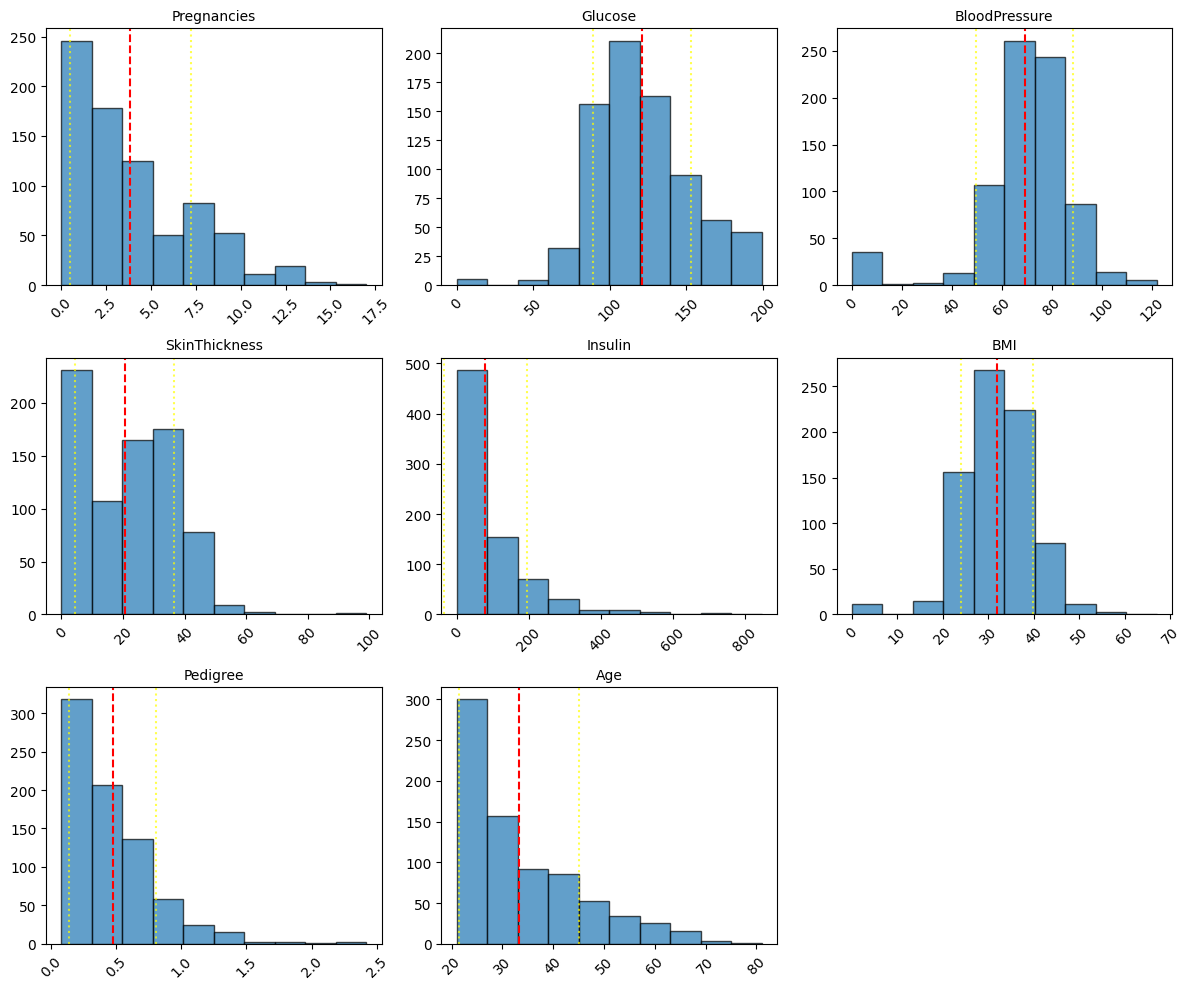

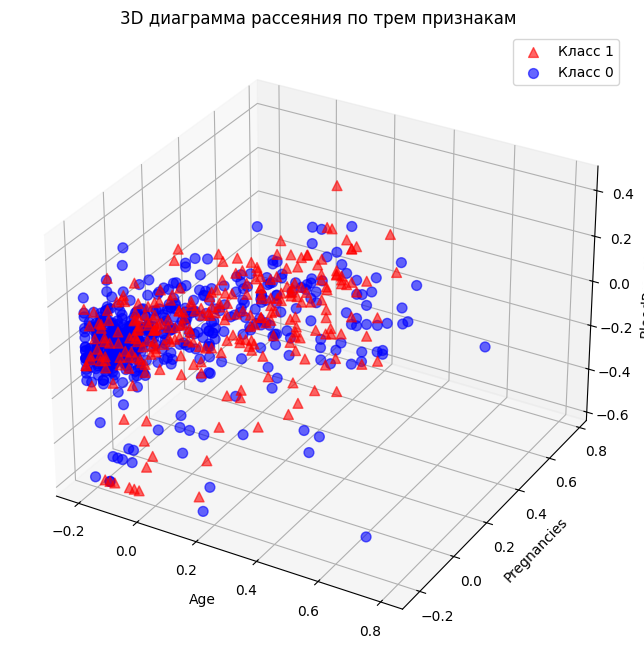

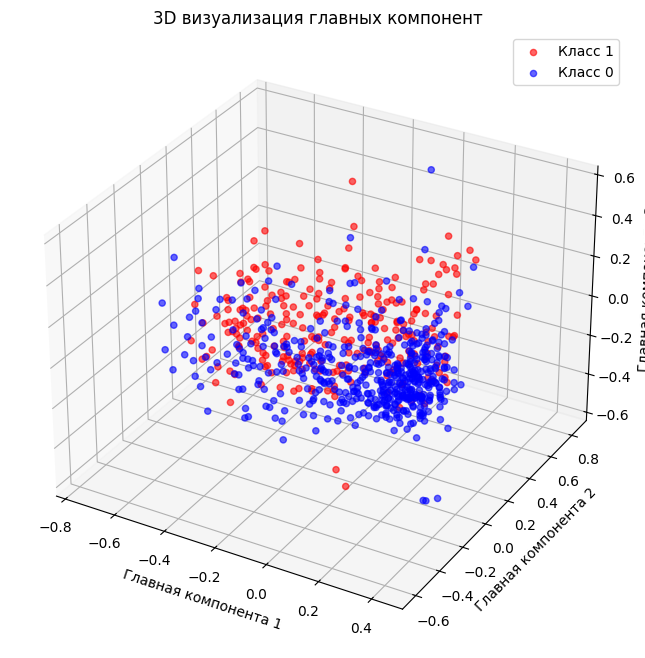


Фиксированные признаки

k=3:
Матрица ошибок:
    0   1
0  75  24
1  24  31
Метрики: {'accuracy': np.float64(0.6883116883116883), 'precision': np.float64(0.5636363636363636), 'recall': np.float64(0.5636363636363636), 'f1_score': np.float64(0.5636363636363636)}

k=5:
Матрица ошибок:
    0   1
0  79  20
1  17  38
Метрики: {'accuracy': np.float64(0.7597402597402597), 'precision': np.float64(0.6551724137931034), 'recall': np.float64(0.6909090909090909), 'f1_score': np.float64(0.6725663716814159)}

k=10:
Матрица ошибок:
    0   1
0  86  13
1  23  32
Метрики: {'accuracy': np.float64(0.7662337662337663), 'precision': np.float64(0.7111111111111111), 'recall': np.float64(0.5818181818181818), 'f1_score': np.float64(0.64)}

Случайные признаки

k=3:
Матрица ошибок:
    0   1
0  79  20
1  29  26
Метрики: {'accuracy': np.float64(0.6818181818181818), 'precision': np.float64(0.5652173913043478), 'recall': np.float64(0.4727272727272727), 'f1_score': np.float64(0.5148514851485148)}

k=5:
Матрица ошибок:

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import math
from sklearn.model_selection import train_test_split

class DiabetesAnalysis:
    def __init__(self, data_path):
        self.data = pd.read_csv(data_path)
        self.process_data()
        
    def process_data(self):
        """Обработка и нормализация данных"""
        # Заполнение пропущенных значений
        self.data.fillna(self.data.mean(), inplace=True)
        
        # Разделение на признаки и целевую переменную
        self.X = self.data.drop(columns=["Outcome"])
        self.y = self.data["Outcome"].astype(int)
        
        # Нормализация признаков
        self.X_normalized = (self.X - self.X.mean()) / (self.X.max() - self.X.min())
        
    def visualize_dataset_statistics(self):
        """Визуализация распределения признаков"""
        n_rows = self.data.shape[0]
        n_bins = 1 + int(math.log(n_rows, 2))
        
        fig, axes = plt.subplots(3, 3, figsize=(12, 10))
        axes = axes.ravel()
        
        for i, column in enumerate(self.X.columns):
            if i < 9:  # Ограничиваем количество графиков
                axes[i].hist(self.data[column], bins=n_bins, edgecolor="black", alpha=0.7)
                mean_val = self.data[column].mean()
                std_val = self.data[column].std()
                
                axes[i].axvline(mean_val, color="red", linestyle="--", label="Среднее")
                axes[i].axvline(mean_val - std_val, color="yellow", linestyle=":", alpha=0.7)
                axes[i].axvline(mean_val + std_val, color="yellow", linestyle=":", alpha=0.7)
                axes[i].set_title(f"{column}", fontsize=10)
                axes[i].tick_params(axis='x', rotation=45)
        
        # Убираем лишние subplots
        for i in range(len(self.X.columns), 9):
            fig.delaxes(axes[i])
            
        fig.tight_layout()
        plt.show()
    
    def create_3d_scatter(self, features=None):
        """3D визуализация выбранных признаков"""
        if features is None:
            features = random.sample(list(self.X.columns), 3)
            
        df_plot = self.X_normalized[features].join(self.y)
        
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')
        
        colors = {0: "blue", 1: "red"}
        markers = {0: "o", 1: "^"}
        
        for outcome in df_plot['Outcome'].unique():
            subset = df_plot[df_plot['Outcome'] == outcome]
            ax.scatter(subset[features[0]], subset[features[1]], subset[features[2]], 
                      color=colors[outcome], marker=markers[outcome],
                      label=f'Класс {outcome}', alpha=0.6, s=50)
        
        ax.set_title('3D диаграмма рассеяния по трем признакам')
        ax.set_xlabel(features[0])
        ax.set_ylabel(features[1])
        ax.set_zlabel(features[2])
        ax.legend()
        plt.show()
        
        return features

    def perform_pca(self, n_components=3):
        """Выполнение PCA анализа"""
        X_array = np.asarray(self.X_normalized)
        covariance_matrix = np.cov(X_array, rowvar=False)
        
        eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
        eigen_pairs = [(eigenvalues[i], eigenvectors[:, i]) for i in range(len(eigenvalues))]
        eigen_pairs.sort(key=lambda x: x[0], reverse=True)
        
        principal_components = np.array([eigen_pairs[i][1] for i in range(n_components)])
        X_pca = np.matmul(X_array, principal_components.T)
        
        self.X_pca = pd.DataFrame(X_pca, 
                                columns=[f"ГК{i+1}" for i in range(n_components)]).join(self.y.rename('Outcome'))
        return self.X_pca
    
    def visualize_pca(self):
        """Визуализация результатов PCA"""
        if not hasattr(self, 'X_pca'):
            self.perform_pca()
            
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')
        
        colors = {0: "blue", 1: "red"}
        
        for outcome in self.X_pca['Outcome'].unique():
            subset = self.X_pca[self.X_pca['Outcome'] == outcome]
            ax.scatter(subset['ГК1'], subset['ГК2'], subset['ГК3'], 
                      color=colors[outcome], label=f'Класс {outcome}', alpha=0.6)
        
        ax.set_title('3D визуализация главных компонент')
        ax.set_xlabel('Главная компонента 1')
        ax.set_ylabel('Главная компонента 2')
        ax.set_zlabel('Главная компонента 3')
        ax.legend()
        plt.show()


class KNNClassifier:
    def __init__(self, n_neighbors=5):
        self.n_neighbors = n_neighbors
        
    def fit(self, X_train, y_train):
        self.X_train = np.asarray(X_train)
        self.y_train = np.asarray(y_train)
        
    def _calculate_distances(self, x):
        return np.sqrt(np.sum((self.X_train - x) ** 2, axis=1))
    
    def predict(self, X_test):
        X_test = np.asarray(X_test)
        predictions = []
        
        for sample in X_test:
            distances = self._calculate_distances(sample)
            nearest_indices = np.argsort(distances)[:self.n_neighbors]
            nearest_labels = self.y_train[nearest_indices]
            prediction = np.bincount(nearest_labels).argmax()
            predictions.append(prediction)
            
        return np.array(predictions)


class ModelEvaluator:
    @staticmethod
    def create_confusion_matrix(y_true, y_pred):
        classes = np.unique(np.concatenate((y_true, y_pred)))
        cm = pd.DataFrame(0, index=classes, columns=classes)
        
        for true, pred in zip(y_true, y_pred):
            cm.loc[true, pred] += 1
            
        return cm
    
    @staticmethod
    def calculate_metrics(confusion_matrix):
        tn, fp, fn, tp = confusion_matrix.values.ravel()
        
        accuracy = (tp + tn) / (tp + tn + fp + fn)
        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
        
        return {
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1_score': f1_score
        }
    
    def evaluate_models(self, X_train_sets, y_train, X_test_sets, y_test, k_values, set_names):
        results = {}
        
        for name, (X_tr, X_te) in X_train_sets.items():
            print(f"\n{name}")
            print("=" * 50)
            
            set_results = {}
            for k in k_values:
                knn = KNNClassifier(n_neighbors=k)
                knn.fit(X_tr, y_train)
                y_pred = knn.predict(X_te)
                
                cm = self.create_confusion_matrix(y_test, y_pred)
                metrics = self.calculate_metrics(cm)
                
                set_results[k] = {'matrix': cm, 'metrics': metrics}
                
                print(f"\nk={k}:")
                print(f"Матрица ошибок:\n{cm}")
                print(f"Метрики: {metrics}")
                
            results[name] = set_results
            
        return results



# Инициализация анализа
analysis = DiabetesAnalysis('diabetes.xls')
    
# Анализ данных
print("Статистика датасета:")
print(analysis.data.describe())
    
# Визуализации
analysis.visualize_dataset_statistics()
selected_features = analysis.create_3d_scatter()
analysis.visualize_pca()
    
# Подготовка данных для классификации
X_train, X_test, y_train, y_test = train_test_split(
    analysis.X_normalized, analysis.y, test_size=0.2, random_state=42
)
    
# Определение наборов признаков
fixed_features = ['Pregnancies', 'Glucose', 'BMI', 'Age']
random_features = random.sample(list(analysis.X.columns), 3)
pca_features = ['ГК1', 'ГК2', 'ГК3'] if hasattr(analysis, 'X_pca') else []
    
X_sets = {
    'Фиксированные признаки': (X_train[fixed_features], X_test[fixed_features]),
    'Случайные признаки': (X_train[random_features], X_test[random_features]),
}
    
# Добавляем PCA признаки если они доступны
if hasattr(analysis, 'X_pca'):
    X_train_pca = analysis.X_pca[['ГК1', 'ГК2', 'ГК3']].iloc[X_train.index]
    X_test_pca = analysis.X_pca[['ГК1', 'ГК2', 'ГК3']].iloc[X_test.index]
    X_sets['Главные компоненты'] = (X_train_pca, X_test_pca)
    
# Оценка моделей
evaluator = ModelEvaluator()
k_values = [3, 5, 10]
    
results = evaluator.evaluate_models(
    X_sets, y_train, X_sets, y_test, k_values, list(X_sets.keys())
)